**AUTHOR : ARYAN SAWANT**

**KMeans Clustering of Iris Flower Classification**

**Uploading the dataset file**

In [1]:
from google.colab import files
u=files.upload()

Saving archive (2).zip to archive (2).zip


In [2]:
#Extracting the zip file
import zipfile
zip=zipfile.ZipFile("/content/archive (2).zip","r")
zip.extractall('/content')
zip.close()

**Importing all necessary libraries required**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Dropping unnecessary column
data= data.drop(columns=['Id'])

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
#Checking numerical and categorical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#Checking any null values if present
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Splitting the data to Train and Test**

In [35]:
X = data.iloc[:, [0, 1, 2, 3]].values

In [36]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**Performing Elbow Method to find the Optimal Number of Clusters**

In [37]:
from sklearn.cluster import KMeans
wcss=[]

In [38]:
#Elbow Method(Used when we are not aware what is the optimal clusters number)
for i in range(1,11): #Using range function to find the elbow
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0) #k-means++ algo is a smart way to initialize centroids with improved quality of clusters
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) #kmeans.inertia_ is a formula used to segregate the datapoints in the dataset into clusters

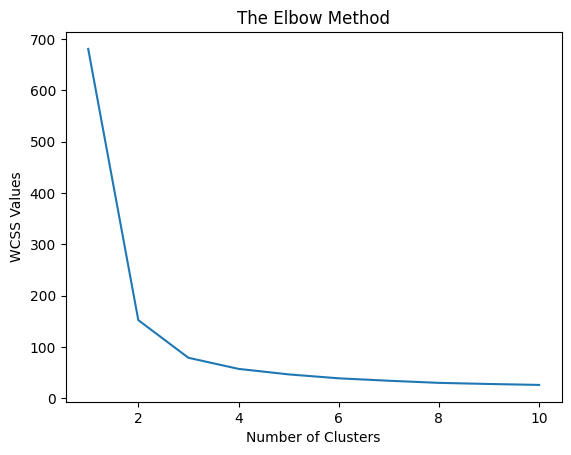

In [39]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Values")
plt.show()

In [40]:
#In above graph we got optimal number of cluster at 3 (i.e the elbow was formed at 3)
kmeansmodel=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeansmodel.fit_predict(X)

In [41]:
y_kmeans = kmeansmodel.fit_predict(X)

**Training a Model using Unsupervised Learning Algorithm (KMeans)**

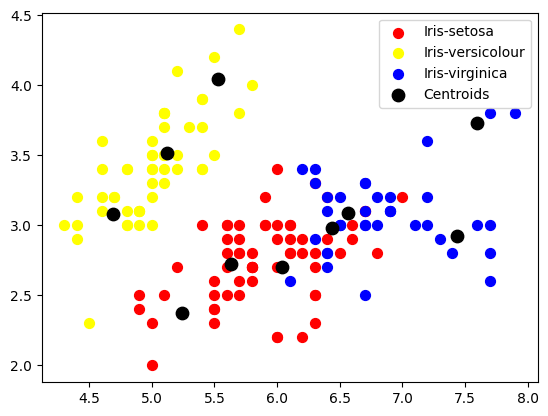

In [42]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s=50,c='red',label="Iris-setosa") # X is our data  and the 2 matrices y_kmeans represents the output clusters and s is size of cluster(Customizable)
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s=50,c='yellow',label="Iris-versicolour")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s=50,c='blue',label="Iris-virginica")

#Plotting Centroids to make it more informative
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=80,c='black',label='Centroids')

plt.legend()
plt.show()
